In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
trash_haulers = pd.read_csv('../data/trash_hauler_report.csv')
trash_haulers

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
0,25270,11/1/2017,Trash - Backdoor,"house with the wheel chair ramp, they share dr...",3817 Crouch Dr,37207.0,RED RIVER,3205,2.0,1727970.412,686779.4781
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002


In [3]:
trash_haulers.shape

(20226, 11)

In [4]:
trash_haulers.columns

Index(['Request Number', 'Date Opened', 'Request ', 'Description',
       'Incident Address', 'Zip Code', 'Trash Hauler', 'Trash Route',
       'Council District', 'State Plan X', 'State Plan Y'],
      dtype='object')

In [5]:
# this is looking for all the requests that have 'missed pickup' in their title and for descriptions that also contain information about a pick up being missed.
missed_trash = trash_haulers.loc[
(trash_haulers['Request '].str.contains('missed pickup', case=False, na=False)) | (trash_haulers['Description'].str.contains('miss|missed|skip|not collected|did not pick up|skipped|not emptied|not taken|full|cart still out|still full|still out|never empty|not picked up', case=False, na=False))]
missed_trash

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
1,25274,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/Trash miss Tuesday.,4028 Clarksville Pike,37218.0,RED RIVER,4202,1.0,1721259.366,685444.7996
2,25276,11/1/2017,Trash - Curbside/Alley Missed Pickup,Curb/trash miss Tuesday.,6528 Thunderbird Dr,37209.0,RED RIVER,4205,20.0,1707026.753,659887.4716
3,25307,11/1/2017,Trash - Curbside/Alley Missed Pickup,missed,2603 old matthews rd,37207.0,WASTE IND,2206,2.0,1735691.771,685027.2459
4,25312,11/1/2017,Trash - Curbside/Alley Missed Pickup,Missed the even side of the road.,604 croley dr,37209.0,RED RIVER,4203,20.0,1710185.772,664205.1011
7,25327,11/1/2017,Trash Collection Complaint,"Trash out on time, miss again Tuesday. ALLEY",1816 Jo Johnston Ave,37203.0,METRO,9208,21.0,1731459.367,666013.6012
...,...,...,...,...,...,...,...,...,...,...,...
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511
20222,267126,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire alley,"1621 Long Ave, Nashville, TN 37206, United States",37206.0,METRO,9508,6.0,1749711.399,669201.6016
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038
20224,267134,11/1/2019,Trash - Curbside/Alley Missed Pickup,Caller stated trash was missed & were only pic...,"3325 Murfreesboro Pike, Nashville, TN 37013, U...",37013.0,RED RIVER,4502,32.0,1785224.998,627146.4002


In [6]:
# This is counting all the requests that will be charged $200.00 since they happened more than once.
payable_miss = missed_trash.loc[missed_trash.duplicated(subset= 'Incident Address', keep='first') == True]
payable_miss

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
46,25586,11/2/2017,Trash - Curbside/Alley Missed Pickup,Missed pickup,4311 dakota ave,37209.0,RED RIVER,1308,24.0,1720742.740,661438.8185
137,26284,11/6/2017,Trash - Curbside/Alley Missed Pickup,missed,3124 Murfreesboro Pike,37013.0,RED RIVER,4502,33.0,1784737.314,629098.4513
156,26674,11/7/2017,Trash - Curbside/Alley Missed Pickup,customer says trash is not being picked up bet...,111 2nd Ave N,37201.0,NaN,NaN,19.0,1739543.365,666600.8018
160,26745,11/7/2017,Trash - Curbside/Alley Missed Pickup,Missed.,1112 Joseph Ave A,37207.0,METRO,9207,5.0,1740730.565,677098.4003
167,26864,11/8/2017,Trash - Curbside/Alley Missed Pickup,customer says the trash pickup was missed again,3210 Whites Creek Pike,37207.0,RED RIVER,3201,3.0,1726432.966,691919.2003
...,...,...,...,...,...,...,...,...,...,...,...
20213,267035,11/1/2019,Trash - Curbside/Alley Missed Pickup,"constantly missed, please pick up","1400 Dickerson Pike, Nashville, TN 37207, Unit...",37207.0,METRO,9204,5.0,1740796.199,679412.7988
20214,267060,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire street missed,"639 Heritage Dr, Nashville, TN 37115, United S...",37115.0,RED RIVER,3412,8.0,1754841.800,705326.3996
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038


find_dupe = missed_trash.loc[missed_trash['Incident Address'] == '3318 Anderson Rd']
find_dupe

In [7]:
#This has the sum of money due based off of the df above.
money_due = payable_miss.count() *200
money_due

Request Number      1054000
Date Opened         1054000
Request             1054000
Description         1053000
Incident Address    1052400
Zip Code            1051200
Trash Hauler         980200
Trash Route          978600
Council District    1051600
State Plan X        1051800
State Plan Y        1051800
dtype: int64

In [8]:
haulers = payable_miss['Trash Hauler'].value_counts()
haulers

Trash Hauler
RED RIVER    3783
METRO         821
WASTE IND     282
Metro          15
Name: count, dtype: int64

In [9]:
requests = payable_miss['Request '].value_counts()
requests

Request 
Trash - Curbside/Alley Missed Pickup    3728
Trash - Backdoor                        1081
Trash Collection Complaint               459
Damage to Property                         2
Name: count, dtype: int64

In [10]:
all_haulers = trash_haulers['Trash Hauler'].value_counts()
all_haulers

Trash Hauler
RED RIVER    14395
METRO         3512
WASTE IND     1350
Metro           68
Name: count, dtype: int64

In [11]:
all_requests = trash_haulers['Request '].value_counts()
all_requests

Request 
Trash - Curbside/Alley Missed Pickup    15028
Trash - Backdoor                         2629
Trash Collection Complaint               2312
Damage to Property                        257
Name: count, dtype: int64

In [19]:
red_river_payable = payable_miss.loc[payable_miss['Trash Hauler'] == 'RED RIVER']
red_river_payable

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
46,25586,11/2/2017,Trash - Curbside/Alley Missed Pickup,Missed pickup,4311 dakota ave,37209.0,RED RIVER,1308,24.0,1720742.740,661438.8185
137,26284,11/6/2017,Trash - Curbside/Alley Missed Pickup,missed,3124 Murfreesboro Pike,37013.0,RED RIVER,4502,33.0,1784737.314,629098.4513
167,26864,11/8/2017,Trash - Curbside/Alley Missed Pickup,customer says the trash pickup was missed again,3210 Whites Creek Pike,37207.0,RED RIVER,3201,3.0,1726432.966,691919.2003
168,26867,11/8/2017,Trash - Curbside/Alley Missed Pickup,entire street was missed yesterday 11/07/17,3550 Pewitt Rd,37218.0,RED RIVER,3203,1.0,1721976.123,687846.9273
181,27032,11/8/2017,Trash - Curbside/Alley Missed Pickup,customer says missed pickup every week,3702 Hobbs Rd,37215.0,RED RIVER,3304,34.0,1721317.066,645218.7019
...,...,...,...,...,...,...,...,...,...,...,...
20208,266961,11/1/2019,Trash - Curbside/Alley Missed Pickup,Three months of inconsistent trash pickup some...,"3929 Stewarts Ln, Nashville, TN 37218, United ...",37218.0,RED RIVER,3203,1.0,1713735.868,680060.9806
20214,267060,11/1/2019,Trash - Curbside/Alley Missed Pickup,entire street missed,"639 Heritage Dr, Nashville, TN 37115, United S...",37115.0,RED RIVER,3412,8.0,1754841.800,705326.3996
20221,267125,11/1/2019,Trash - Curbside/Alley Missed Pickup,MISSED...NEIGHBORS MISSED,2731 Murfreesboro Pike,37013.0,RED RIVER,4502,32.0,1781137.263,632448.5511
20223,267130,11/1/2019,Trash - Curbside/Alley Missed Pickup,missed several,"2943 Windemere Cir, Nashville, TN 37214, Unite...",37214.0,RED RIVER,1502,15.0,1770293.388,674936.3038


In [22]:
metro_payable = payable_miss.loc[payable_miss['Trash Hauler'] == 'METRO']
metro_payable

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
160,26745,11/7/2017,Trash - Curbside/Alley Missed Pickup,Missed.,1112 Joseph Ave A,37207.0,METRO,9207,5.0,1740730.565,677098.4003
267,28248,11/15/2017,Trash - Curbside/Alley Missed Pickup,missed trash for past 2 weeks,2416 brasher ave,37206.0,METRO,9503,5.0,1747737.287,678856.0147
337,29050,11/20/2017,Trash - Curbside/Alley Missed Pickup,cust says missed pickup again,1009 Southside Ave B,37203.0,METRO,9407,17.0,1737251.719,660570.7055
345,29170,11/20/2017,Trash - Backdoor,customer says trash pickup was missed again,936 Cahal Ave,37206.0,METRO,9507,5.0,1748206.373,679274.3995
410,30295,11/28/2017,Trash - Curbside/Alley Missed Pickup,customer says there's two trash carts for unit...,1424 STAINBACK AVE,37207.0,METRO,9204,5.0,1743016.163,679855.2007
...,...,...,...,...,...,...,...,...,...,...,...
20195,266811,11/1/2019,Trash - Curbside/Alley Missed Pickup,2 trash/carts both missed {Tuesday} curb,"203 Mcmillin St, Nashville, TN 37203, United S...",37203.0,METRO,9208,21.0,1734115.836,664921.0333
20196,266818,11/1/2019,Trash - Curbside/Alley Missed Pickup,Trash was not picked up on 10/29 and the trash...,"203 Mcmillin St, Nashville, TN 37203, United S...",37203.0,METRO,9208,21.0,1734115.836,664921.0333
20205,266944,11/1/2019,Trash - Backdoor,backdoor miss/ again Thursday,"812 Horner Ave, Nashville, TN 37204, United St...",37204.0,METRO,9404,17.0,1738948.631,652136.9083
20212,267023,11/1/2019,Trash - Curbside/Alley Missed Pickup,Trash/missed Thursday {carts sit's on the Arch...,"1098 12th Ave S, Nashville, TN 37203, United S...",37203.0,METRO,9407,17.0,1736440.901,660570.3200


In [24]:
waste_payable = payable_miss.loc[payable_miss['Trash Hauler'] == 'WASTE IND']
waste_payable

,Request Number,Date Opened,Request,Description,Incident Address,Zip Code,Trash Hauler,Trash Route,Council District,State Plan X,State Plan Y
589,32457,12/8/2017,Trash - Backdoor,Missed backdoor - bothered he has to call inst...,1251 1st Ave S B,37210.0,WASTE IND,4409,17.0,1743619.378,659697.5111
647,33303,12/13/2017,Trash - Curbside/Alley Missed Pickup,I have 2 containers they picked up the less fu...,4111 Media St,37209.0,WASTE IND,2306,24.0,1721621.765,660552.0023
687,33671,12/15/2017,Trash - Backdoor,Missed backdoor trash pickup. UNIT-B,1251 1st Ave S B,37210.0,WASTE IND,4409,17.0,1743619.378,659697.5111
736,34527,12/21/2017,Trash - Curbside/Alley Missed Pickup,Trash not picked up 12/20,419 36th Ave N B,37209.0,WASTE IND,3306,24.0,1724064.872,663828.4779
764,34759,12/21/2017,Trash - Backdoor,Missed.,313 Polk Ave,37210.0,WASTE IND,4407,17.0,1746453.546,655016.9542
...,...,...,...,...,...,...,...,...,...,...,...
19350,260002,10/16/2019,Trash - Curbside/Alley Missed Pickup,"5 trash/carts out curb , missed all on Hume St...","1602 5th Ave N, Nashville, TN 37208, United St...",37208.0,WASTE IND,3207,19.0,1734945.918,673443.3110
19360,260046,10/16/2019,Trash - Curbside/Alley Missed Pickup,missed,"1727 3rd Ave N, Nashville, TN 37208, United St...",37208.0,WASTE IND,3207,19.0,1735038.589,674889.7873
19875,262829,10/22/2019,Trash Collection Complaint,RESIDENT SAYS THEY HAVE MISSED PICKING UP THE ...,"1535 Arthur Ave, Nashville, TN 37208, United S...",37208.0,WASTE IND,3208,19.0,1732360.173,671851.6870
19953,263619,10/24/2019,Trash - Curbside/Alley Missed Pickup,caller very upset/ trash missed for six weeks....,"3211 Charlotte Ave, Nashville, TN 37209, Unite...",37209.0,WASTE IND,3306,24.0,1725402.601,663264.8008


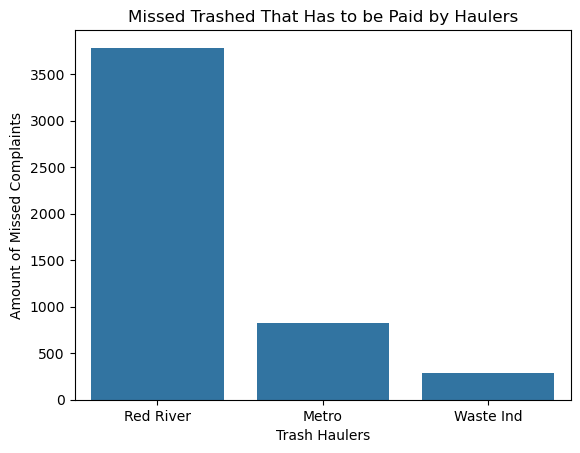

In [29]:
x = ['Red River', 'Metro', 'Waste Ind']
y = [3783, 821, 282]

sns.barplot(x=x, y=y)

plt.title("Missed Trashed That Has to be Paid by Haulers")
plt.xlabel("Trash Haulers")
plt.ylabel("Amount of Missed Complaints")

plt.show()

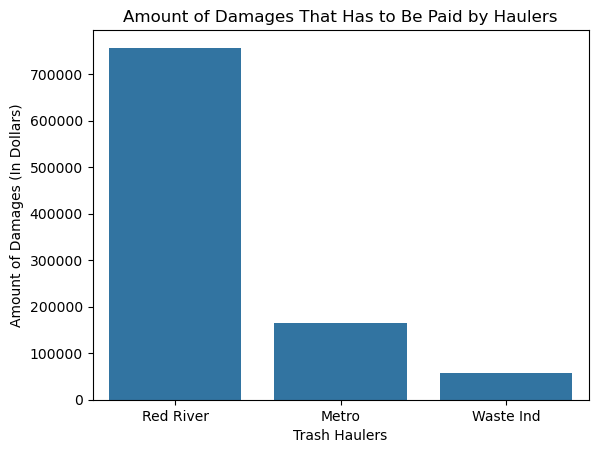

In [36]:
x = ['Red River', 'Metro', 'Waste Ind']
y = [756600, 164200, 56400]

sns.barplot(x=x, y=y)

plt.title("Amount of Damages That Has to Be Paid by Haulers")
plt.xlabel("Trash Haulers")
plt.ylabel("Amount of Damages (In Dollars)")

plt.show()

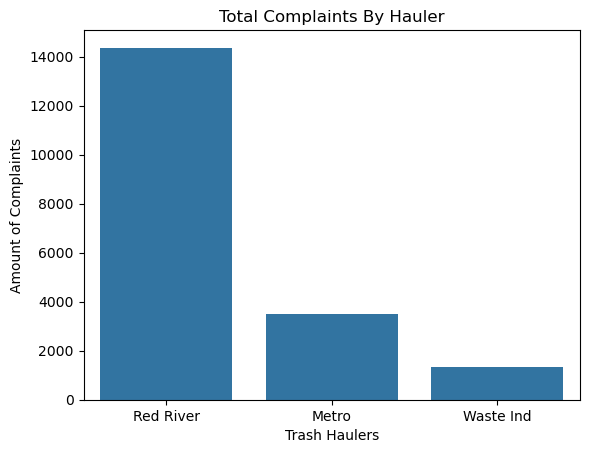

In [31]:
x = ['Red River', 'Metro', 'Waste Ind']
y = [14359, 3512, 1350]

sns.barplot(x=x, y=y)

plt.title("Total Complaints By Hauler")
plt.xlabel("Trash Haulers")
plt.ylabel("Amount of Complaints")

plt.show()

In [ ]:
missed_trash

plt.hist(haulers)

sns.histplot(haulers, bins = 4, kde = True)
plt.title("Haulers That Missed Trash")

sns.barplot(x=haulers, y=requests)

# This is how I am pulling just the requests from the 'Request' column that contain 'Trash - Curbside/Alley Missed Pickup'.
missed_trash_request = trash_haulers.loc[trash_haulers['Request '] == 'Trash - Curbside/Alley Missed Pickup']
missed_trash_request

# Here I am looking for the duplicated address and only pulling the ones that have been duplicated.
missed_trash_requests = missed_trash_request.duplicated(subset='Incident Address', keep =False)
multi_missed_trash_requests = missed_trash_request[missed_trash_requests == True]
multi_missed_trash_requests

# Here I am just checking my work to make sure there are duplicates.
find_dupes = multi_missed_trash_requests.loc[missed_trash_request['Incident Address'] == '259 Sunrise Ave']
find_dupes

# Here I am asking just for the addresses after the first occurence since the first incident is not payable.
payable_missed_pickups = multi_missed_trash_requests.duplicated(subset='Incident Address', keep='first')
payable_missed_pickups

#Here I am asking for the count of missed pickups that are payable.
count_payable = payable_missed_pickups.sum()
count_payable

# I multiplied the number of payable missed pickups by 200 since every missed pickup after the first one is a $200.00 charge.
amount_due = count_payable * 200
amount_due

#This is the formula that I got from Madi that converts my number into dollars.
print(f"${amount_due:,.2f}")

description = trash_haulers[trash_haulers['Description'].str.contains('miss|missed|skipped', case=False, na=False)]

print(description)

description_only = description.loc[description['Request '] != 'Trash - Curbside/Alley Missed Pickup']
description_only

#How do I convert this back to look like the above? 
payable_description = description_only.duplicated(subset='Incident Address', keep='first')
payable_description

payable_description = description_only.loc[description_only.duplicated(subset='Incident Address', keep='first') == True]
payable_description

pd.merge(payable_description, payable_missed_pickups, how = 'outer', on = 'Request Number')